Remember to document your thoughts and any takeaways as you work through visualizations!

Using your store items data you prepped in lesson 2 exercises:

- Split your data into train and test using the sklearn.model_selection.TimeSeriesSplit method.
- Validate your splits by plotting X_train and y_train.
- Plot the weekly average & the 7-day moving average. Compare the 2 plots.
- Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.
- Plot a time series decomposition.
- Create a lag plot (day over day).
- Run a lag correlation.

In [50]:
import acquire

import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import TimeSeriesSplit

In [4]:
grocery = acquire.get_all_data()

In [43]:
# fmt = '%a, %d %b %Y %H:%M:%S %Z'

# # pd.to_datetime('now').tz_localize('America/Chicago').strftime(fmt)

# grocery.sale_date = pd.to_datetime(grocery.sale_date, format=fmt)

# # don't forget to sort!
# grocery = grocery.sort_values(by='sale_date').set_index('sale_date')

In [42]:
grocery.sale_date =

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
item_id          913000 non-null int64
sale_amount      913000 non-null float64
sale_date        913000 non-null object
sale_id          913000 non-null int64
store_id         913000 non-null int64
item_brand       913000 non-null object
item_name        913000 non-null object
item_price       913000 non-null float64
item_upc12       913000 non-null int64
item_upc14       913000 non-null int64
store_address    913000 non-null object
store_city       913000 non-null object
store_state      913000 non-null object
store_zipcode    913000 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 144.5+ MB


In [5]:
tss = TimeSeriesSplit()

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [6]:
# tscv = TimeSeriesSplit(n_splits=int((len(y)-3)/3))
# for train_index, test_index in tscv.split(X):
#      print("TRAIN:", train_index, "TEST:", test_index)

#      #To get the indices 
#      X_train, X_test = X[train_index], X[test_index]
#      y_train, y_test = y[train_index], y[test_index]

In [8]:
y = grocery.sale_amount
X = grocery.sale_date

In [24]:
tss = TimeSeriesSplit(n_splits=5, max_train_size=None)

for train_index, test_index in tss.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [     0      1      2 ... 152167 152168 152169] TEST: [152170 152171 152172 ... 304333 304334 304335]
TRAIN: [     0      1      2 ... 304333 304334 304335] TEST: [304336 304337 304338 ... 456499 456500 456501]
TRAIN: [     0      1      2 ... 456499 456500 456501] TEST: [456502 456503 456504 ... 608665 608666 608667]
TRAIN: [     0      1      2 ... 608665 608666 608667] TEST: [608668 608669 608670 ... 760831 760832 760833]
TRAIN: [     0      1      2 ... 760831 760832 760833] TEST: [760834 760835 760836 ... 912997 912998 912999]


In [47]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

In [48]:
grocery_train = X_train.copy()
grocery_train["sale_amount"] = y_train.copy()

grocery_test = X_test.copy()
grocery_test["sale_amount"] = y_test.copy()

In [49]:
fmt = '%a, %d %b %Y %H:%M:%S %Z'
grocery_train.sale_date = pd.to_datetime(grocery_train.sale_date, format=fmt)

grocery_test.sale_date = pd.to_datetime(grocery_test.sale_date, format=fmt)

In [41]:
# fmt = '%a, %d %b %Y %H:%M:%S %Z'

# # pd.to_datetime('now').tz_localize('America/Chicago').strftime(fmt)

# grocery.sale_date = pd.to_datetime(grocery.sale_date, format=fmt)

# # don't forget to sort!
# grocery = grocery.sort_values(by='sale_date').set_index('sale_date')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760834 entries, 0 to 760833
Data columns (total 2 columns):
sale_date      760834 non-null object
sale_amount    760834 non-null float64
dtypes: float64(1), object(1)
memory usage: 17.4+ MB


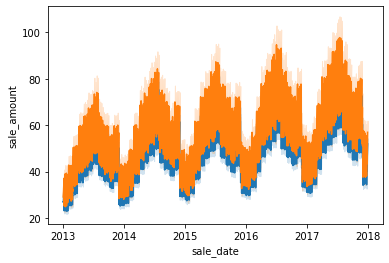

In [52]:
sns.lineplot(x="sale_date", y="sale_amount",data=grocery_train)
sns.lineplot(x="sale_date",y="sale_amount",data=grocery_test)